In [1]:
import matplotlib.pyplot as plt
from plot_sigma_dust import plot
datadir = "output/dust_diffusion/"

Plotting particle distribution for N = 1
N = 10000 particles


(9.5, 10.5)

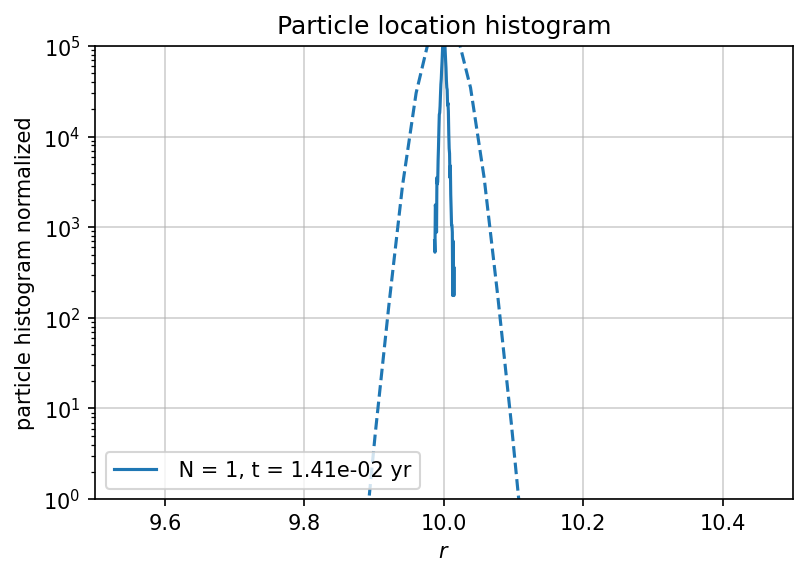

In [15]:
fig, ax = plt.subplots(dpi=150)

inds = range(1,100,20)
inds = [1]
for n in inds:
    plot(ax, datadir, n,toffset=toffset)
    
ax.set_xlim(9.5, 10.5)

In [3]:
from plot_sigma_dust import get_particles

In [4]:
particles = get_particles("output/dust_diffusion/", 0)

In [5]:
particles["stokes"]

array([2.08062023e-05, 2.08062023e-05, 2.08062023e-05, ...,
       2.08062023e-05, 2.08062023e-05, 2.08062023e-05])